#Objectivity
Ibu Putri sebagai manajer di salah satu perusahaan asuransi kesehatan, sedang melakukan riset dan pencarian pola terhadap faktor yang mempengaruhi biaya asuransi. Insight tersebut akan digunakan untuk membuat keputusan apa saja terkait layanan kesehatan yang akan  digunakan untuk support kesehatan di asuransi. Sebagai seorang machine learning engineer, apa yang akan kalian lakukan supaya dapat memberikan insight kepada Bu Putri?

DIKW(Data, Information, Knowledge, Wisdom)

In [86]:
#Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer,OneHotEncoder,OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('Copy of insurance.csv')
data = pd.read_csv('Copy of insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


                                                # MEMAHAMI DATA  #                                                                         

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


                                                   MENDETEKSI OUTLIERS                                                               

In [17]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

                                        MENCARI MISSING VALUES                             

In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#Melihat kesesuaian format data types dalam setiap column pada data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


                               ENCODING DATA MENJADI NUMERICAL                                

In [62]:
sexNewData = {
    'female' : 0, 'male' : 1,
}

df['sex'] = df['sex'].replace(sexNewData)

In [63]:
smokerNewData = {
    'yes' : 1, 'no' : 0,
}

df['smoker'] = df['smoker'].replace(smokerNewData)

In [68]:
regionNewData = {
    'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4,
}

df['region'] = df['region'].replace(regionNewData)

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520


c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

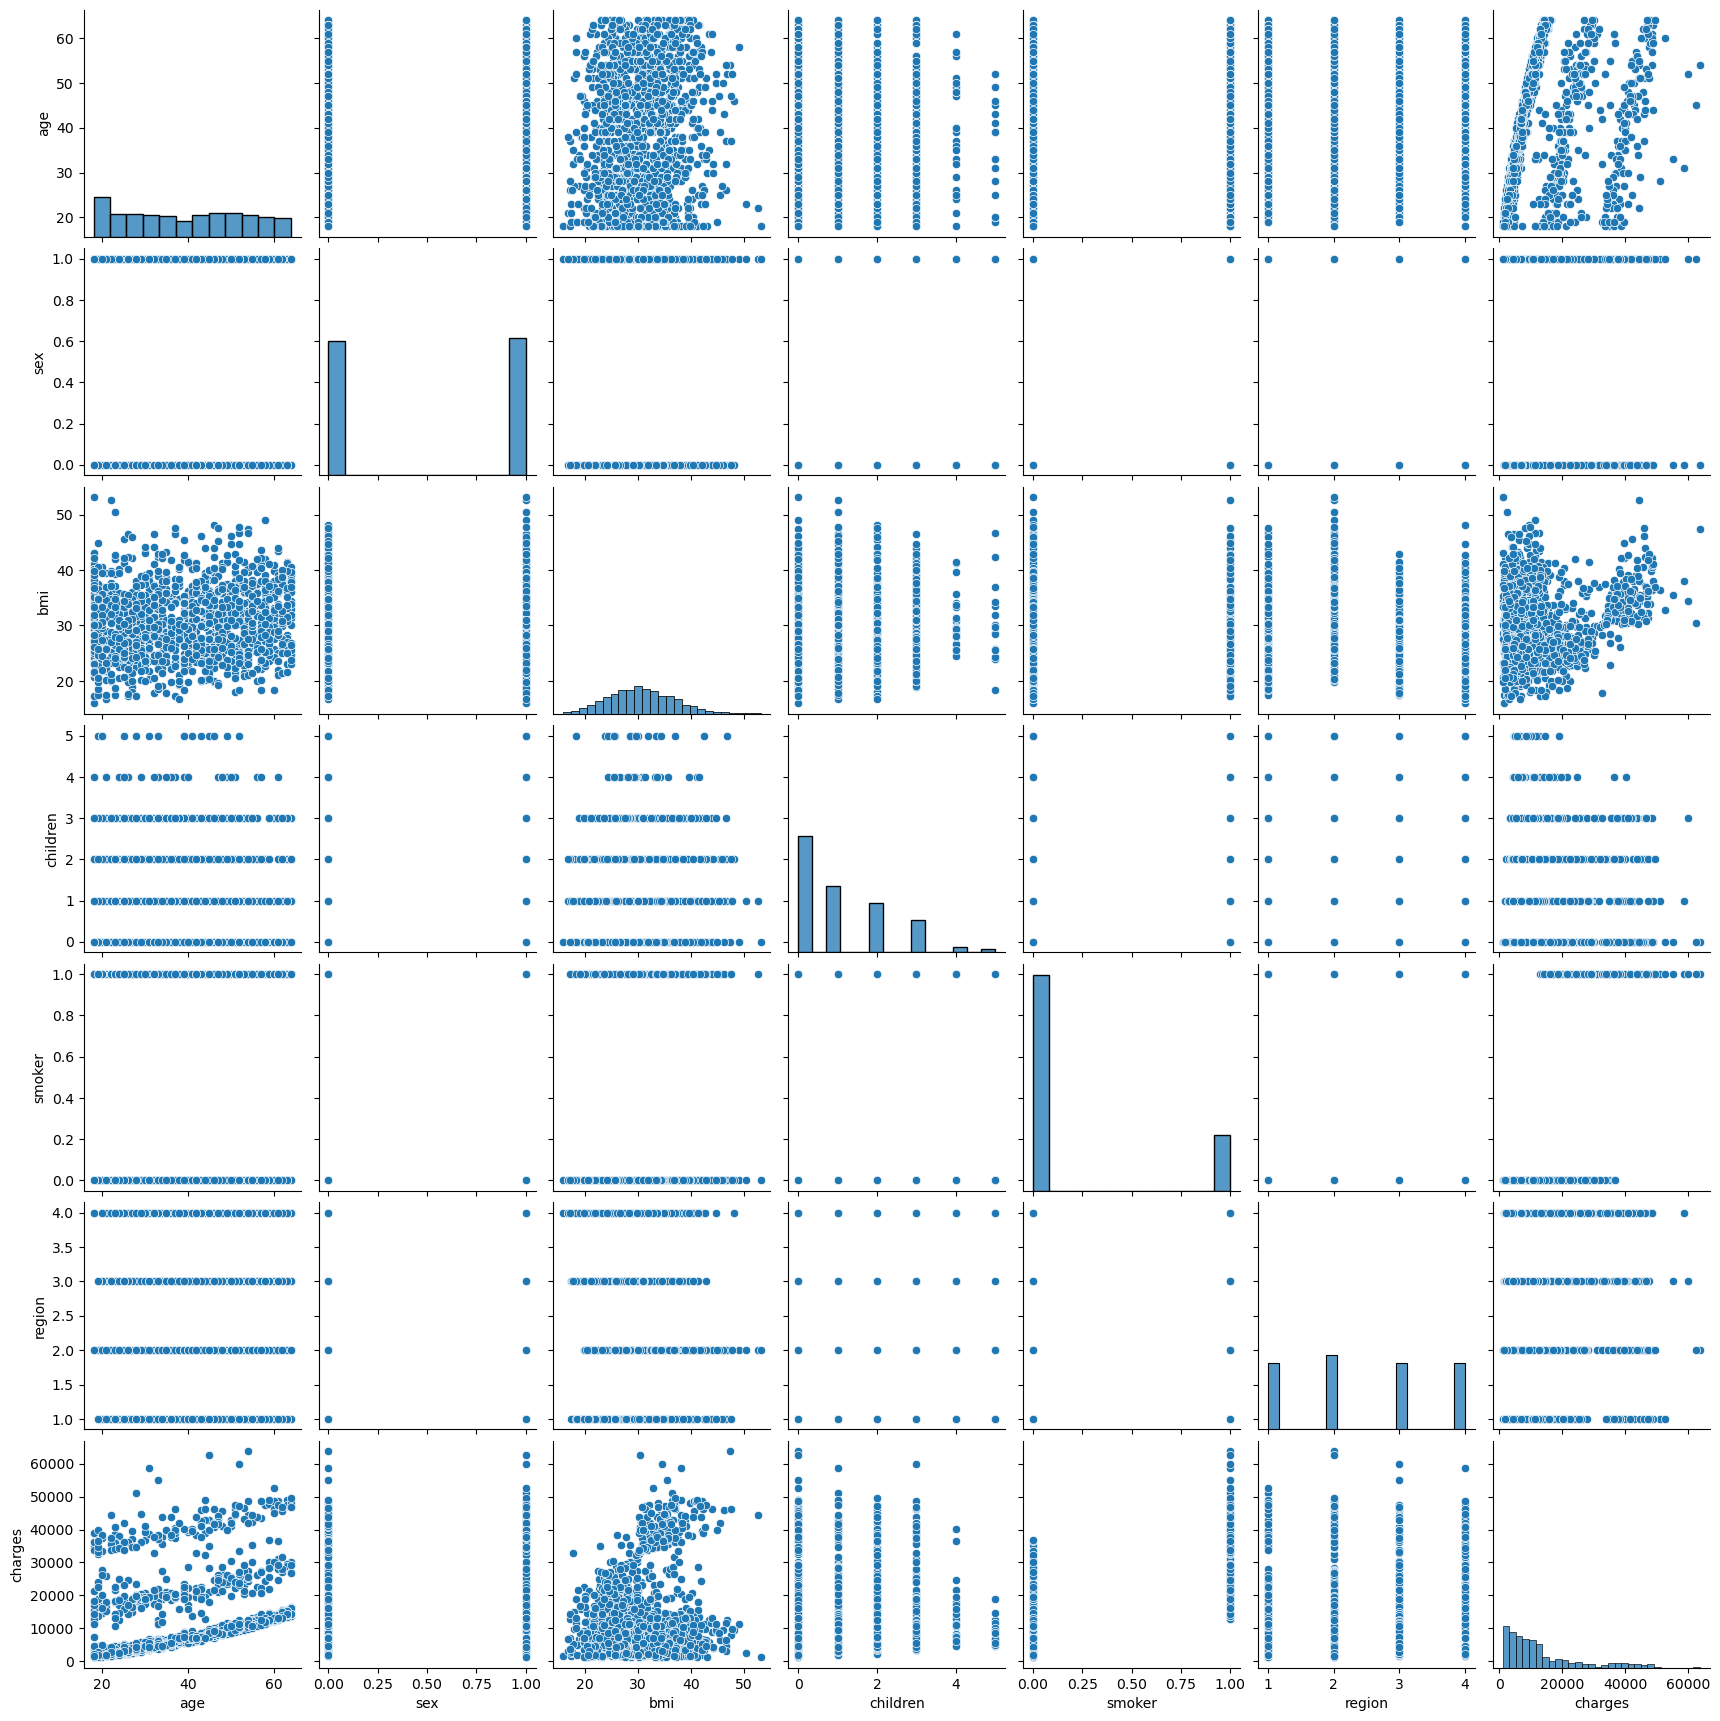

In [65]:
sns.pairplot(df)
plt.show()

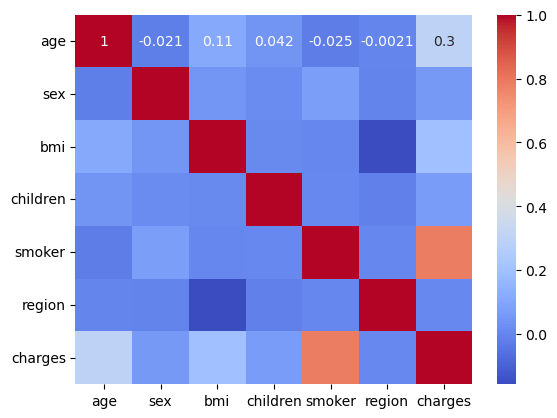

In [55]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [142]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age','charges' ]
log_features = ['bmi']

# Custom OrdinalEncoder untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['female', 'male'], ['no', 'yes'], ['northeast', 'northwest', 'southeast', 'southwest']]))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('log', FunctionTransformer(np.log1p), log_features),
        ],
    remainder='passthrough')

# Transformasi data
data_preprocessed = preprocessor.fit_transform(data)

columns = ['age', 'charges','sex', 'smoker', 'region','bmi','children']

data_preprocessed_new = pd.DataFrame(data_preprocessed,columns=columns)
data_preprocessed_new

,age,charges,sex,smoker,region,bmi,children
0,-1.438764,0.298584,0.0,1.0,3.0,3.363842,0.0
1,-1.509965,-0.953689,1.0,0.0,2.0,3.548755,1.0
2,-0.797954,-0.728675,1.0,0.0,2.0,3.526361,3.0
3,-0.441948,0.719843,1.0,0.0,1.0,3.165686,0.0
4,-0.513149,-0.776802,1.0,0.0,1.0,3.397189,0.0
...,...,...,...,...,...,...,...
1333,0.768473,-0.220551,1.0,0.0,1.0,3.464798,3.0
1334,-1.509965,-0.914002,0.0,0.0,0.0,3.494080,0.0
1335,-1.509965,-0.961596,0.0,0.0,2.0,3.633631,0.0
1336,-1.296362,-0.930362,0.0,0.0,3.0,3.288402,0.0


In [133]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi','charges']


# Custom OrdinalEncoder untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['female', 'male'], ['no', 'yes'], ['northeast', 'northwest', 'southeast', 'southwest']]))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', FunctionTransformer(np.log1p), numeric_features),
        ('cat', categorical_transformer, categorical_features),
      
        ],
    remainder='passthrough')

# Transformasi data
data_preprocessed = preprocessor.fit_transform(data)

columns = ['age', 'bmi','charges', 'smoker', 'region','sex','children']

data_preprocessed_new = pd.DataFrame(data_preprocessed,columns=columns)
data_preprocessed_new

    


,age,bmi,charges,smoker,region,sex,children
0,2.995732,3.363842,9.734236,0.0,1.0,3.0,0.0
1,2.944439,3.548755,7.453882,1.0,0.0,2.0,1.0
2,3.367296,3.526361,8.400763,1.0,0.0,2.0,3.0
3,3.526361,3.165686,9.998137,1.0,0.0,1.0,0.0
4,3.496508,3.397189,8.260455,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1333,3.931826,3.464798,9.268755,1.0,0.0,1.0,3.0
1334,2.944439,3.494080,7.699381,0.0,0.0,0.0,0.0
1335,2.944439,3.633631,7.396847,0.0,0.0,2.0,0.0
1336,3.091042,3.288402,7.605365,0.0,0.0,3.0,0.0


#Pembuatan Model

In [143]:
#Import library yang dibutuhkan
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([("linear_regression", LinearRegression())])

In [144]:
#memisahkan variable faktor dengan variable target
X = data_preprocessed_new.drop(columns=['charges']) 
y = data_preprocessed_new['charges']


In [145]:
#melakukan train set split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
#melakukan fiting dari pipeline terhadap data training
pipe.fit(X_train, y_train)

Pipeline(steps=[('linear_regression', LinearRegression())])

In [156]:
y_pred = pipe.predict(X)

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


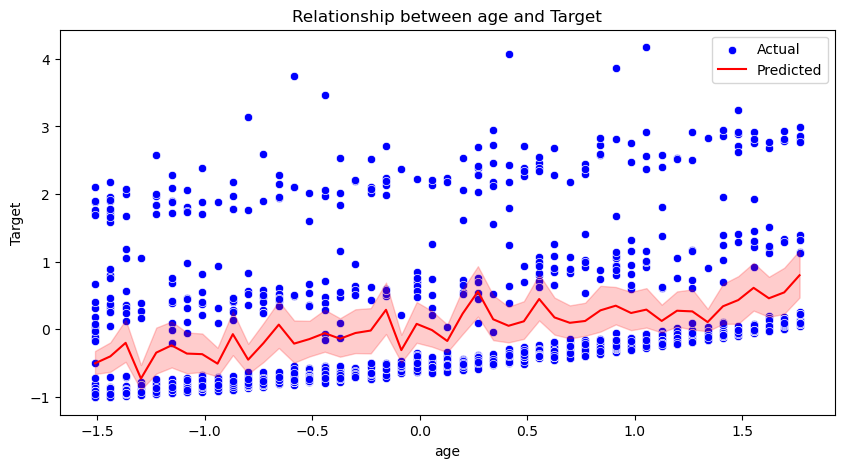

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


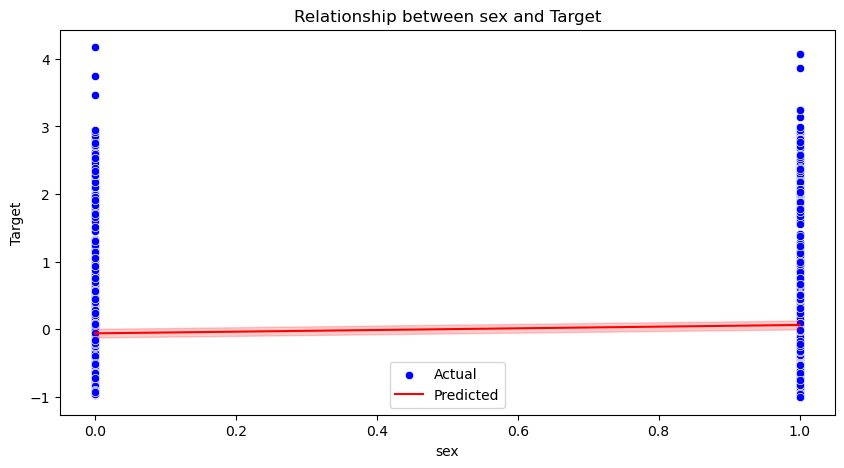

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


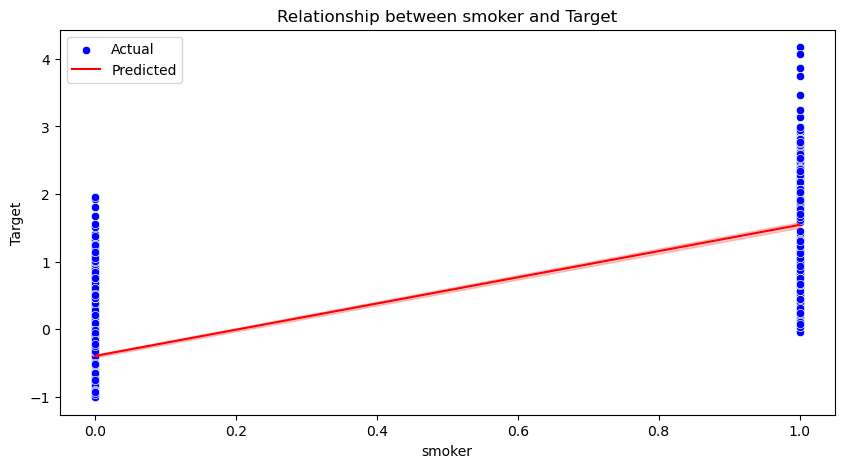

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


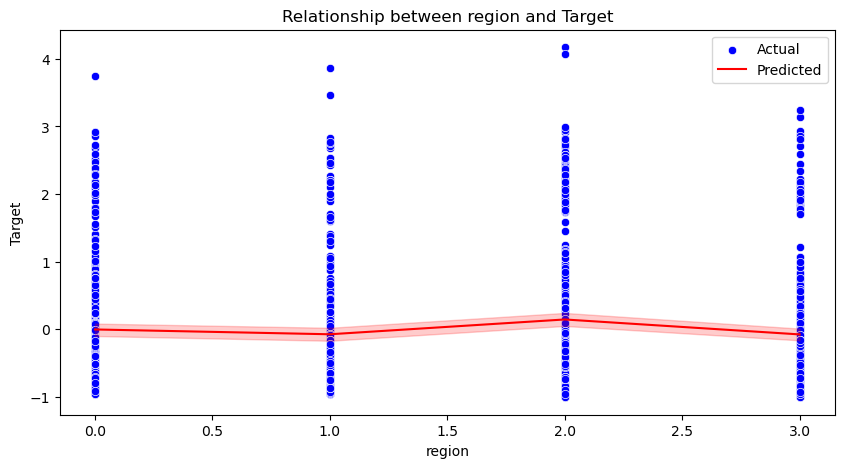

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


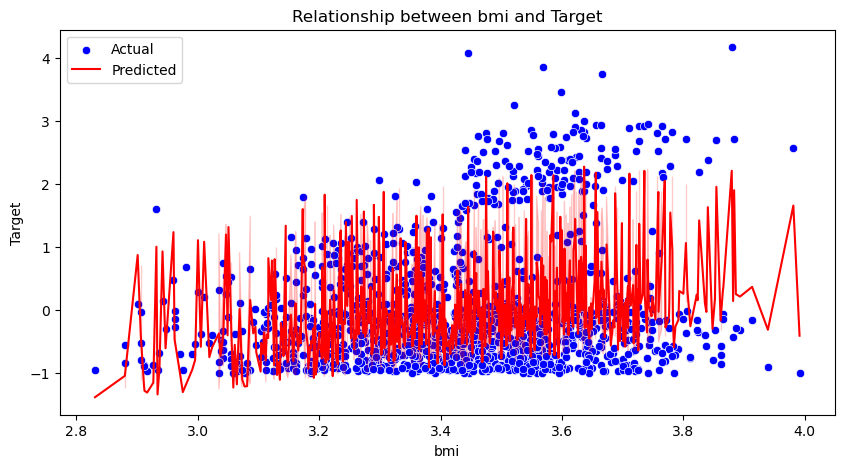

c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fpamu\anaconda3\envs\interpreter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


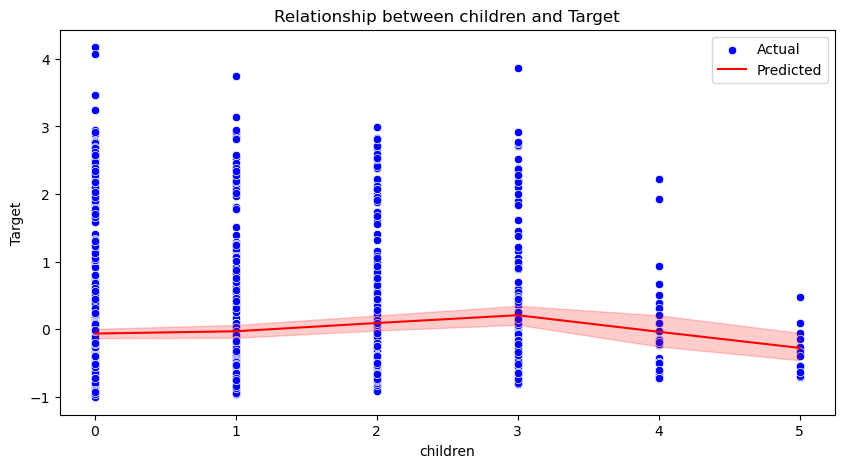

In [157]:
for feature in X.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=X[feature], y=y, label='Actual', color='blue')
    sns.lineplot(x=X[feature], y=y_pred, label='Predicted', color='red')
    plt.title(f'Relationship between {feature} and Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.legend()
    plt.show()

#Evaluasi Model

In [147]:
#Import library yang dibutuhkan
from sklearn.model_selection import cross_val_score 

In [148]:
scores = cross_val_score(pipe, X, y, cv=5)
print("Rata Rata Cross Validation Score :", scores.mean())
print("Standar Deviasi CVS :", scores.std())

Rata Rata Cross Validation Score : 0.7479405328616423
Standar Deviasi CVS : 0.022416923557745345


#Conclusion
Dari data yang kita dapat dan yang sudah kita olah kita mendapatkan good fit pada rata rata akurasi menggunakan cross validation score sebesar 74% akurasi dan memiliki daya kreatifitas model sebesar 2%

#Saving Model

In [150]:
#Import library yang dibutuhkan, pertama copy path lalu tambahkan garis miring lalu tambahkan namamodel.pkl
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe, file)
 

#Load dan Testing Model

In [151]:

with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


#Situasi
Bu putri yang berumur 48 tahun ingin mengetahui berapa biaya asuransi kesehatan yang harus dibayarkan jika dia memiliki 2 anak dan memiliki berat badan sebesar 48.5 kg dan dia tinggal di southwest america serikat dan dia bukan seorang peroko

In [158]:
age = 48
sex = 0
bmi = 48.5
children = 2
smoker = 0
region = 1
data_input = [[age,sex,bmi,children,smoker,region]]
prediction = loaded_model.predict(data_input)
print(prediction)

[[48, 0, 48.5, 2, 0, 1]]

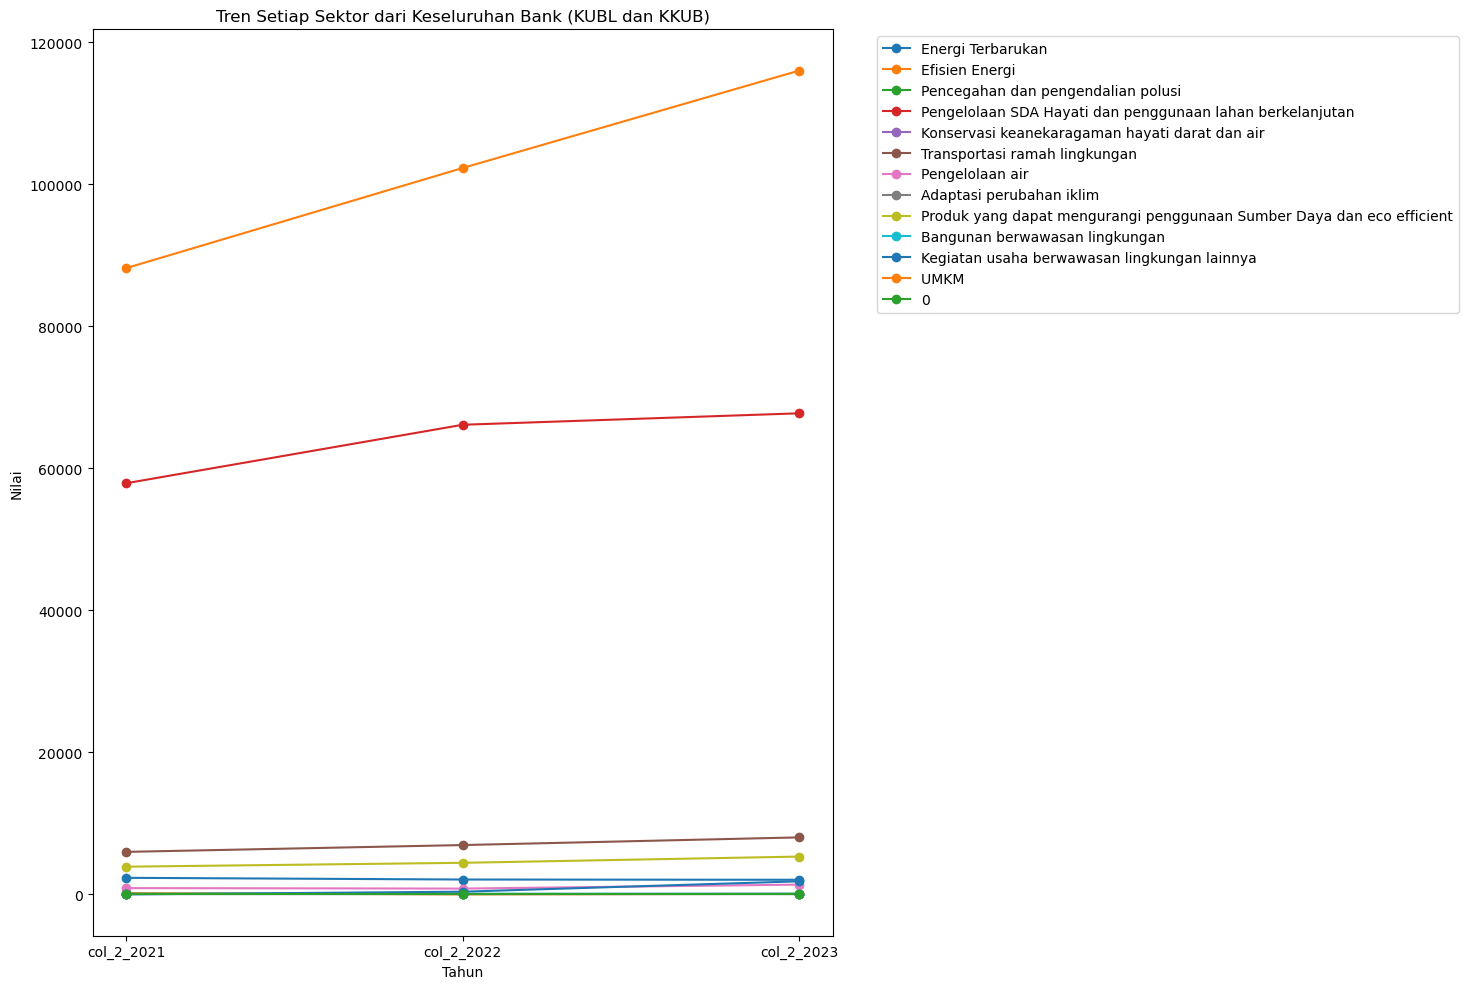

In [12]:
df = pd.read_excel("udah.xlsx")
df = df.fillna(0)

# Mengatur ukuran plot

# Mengatur ukuran plot
df = df.replace('-', 0).fillna(0)

# Pastikan bahwa kolom tahun dikonversi ke tipe data float
for col in df.columns[1:4]:
    df[col] = df[col].astype(float)

# Mengatur ukuran plot
plt.figure(figsize=(15, 10))

# Membuat plot untuk setiap sektor
for index, row in df.iterrows():
    years = df.columns[1:4]  # Asumsi kolom tahun berada di urutan ke-2 sampai ke-4
    values = row[1:4].astype(float)  # Pastikan nilai diubah menjadi float
    plt.plot(["2021", "2022", "2023"], row[1:4], marker='o', label=row["KUBL dan KKUB"])

# Menambahkan judul dan label
plt.title('Tren Setiap Sektor dari Keseluruhan Bank (KUBL dan KKUB)')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
scores = cross_val_score(pipe, X, y, cv=5)
print("Rata Rata Cross Validation Score :", scores.mean())
print("Standar Deviasi CVS :", scores.std())

Rata Rata Cross Validation Score : 0.7479405328616423
Standar Deviasi CVS : 0.022416923557745345
